# PCA IN PRACTICE WITH A LARGER DATASET

You are now provided with a dataset consisting of 500 users, where each user has four features: Usage time, Interactions, Activity type 1, Activity type 2. You will apply PCA using python to reduce the dimensionality

## TASKS

1. LOADING THE DATASET - Loading the dataset and computing covariance matrix of the data

In [11]:
import pandas as pd

# Load the dataset
user_activity_data = pd.read_csv('user_activity_data.csv')

# Convert the user activity data to a matrix
user_activity_matrix = user_activity_data.values

# Display the shape of the matrix to confirm the conversion
user_activity_matrix.shape

(500, 4)

Computing the covariance matrix


In [20]:
mean = user_activity_matrix.mean()
centered_data = user_activity_matrix - mean
cov_matrix = np.cov(centered_data, rowvar=False)
print(cov_matrix)

[[385.14317418   2.89214677  -3.14729032   1.70302815]
 [  2.89214677  33.42292184  -1.63807388   0.55538659]
 [ -3.14729032  -1.63807388  24.5661308   -1.05278947]
 [  1.70302815   0.55538659  -1.05278947   8.35248038]]


Performing PCA

In [21]:
import numpy as np

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues:
 [385.20247624   8.27075746  33.70345427  24.30801924]
Eigenvectors:
 [[-0.99991691 -0.00385725 -0.00981203  0.00741691]
 [-0.00826886 -0.01755614  0.98389093  0.17771336]
 [ 0.00877718  0.06196225 -0.17625618  0.98235299]
 [-0.00455545  0.99791662  0.0282155  -0.05784073]]


In [22]:
# Calculate the explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Calculate the cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Find the number of components needed to retain at least 90% of the variance
num_components = np.argmax(cumulative_explained_variance >= 0.90) + 1

print("Number of principal components needed to retain at least 90% of the total variance:", num_components)

Number of principal components needed to retain at least 90% of the total variance: 3


Projecting the data to the first two principal components and creating a 2D representation of the transformed data

In [23]:
# Select the eigenvectors corresponding to the two largest eigenvalues
top_2_eigenvectors = eigenvectors[:, :2]

# Project the centered data onto the top 2 eigenvectors
projected_data_2d = np.dot(centered_data, top_2_eigenvectors)

print("Projected data (first two principal components):\n", projected_data_2d)

Projected data (first two principal components):
 [[ -86.10484873  -37.23746439]
 [ -73.50227397  -31.94097494]
 [ -89.09479605  -41.80133233]
 [-106.60588125  -26.02129705]
 [ -71.42988842  -31.90653522]
 [ -71.42935626  -34.55569341]
 [-107.69208138  -35.70947452]
 [ -91.52671215  -34.99915191]
 [ -66.86501232  -34.1297402 ]
 [ -87.03464151  -33.82437907]
 [ -67.0359864   -34.21229636]
 [ -66.85765341  -35.08707044]
 [ -80.99201725  -35.73584699]
 [ -37.88119177  -35.68630557]
 [ -41.74214016  -36.37690918]
 [ -64.8728274   -31.84017957]
 [ -55.85539348  -33.25992368]
 [ -82.40093077  -44.44902868]
 [ -58.04368436  -33.563841  ]
 [ -47.92129475  -34.80681071]
 [-105.50773537  -35.91555216]
 [ -71.60582552  -36.4306138 ]
 [ -77.59200949  -32.30356623]
 [ -47.68148437  -32.46187191]
 [ -65.27156588  -37.97984142]
 [ -78.5217978   -34.67456488]
 [ -53.04218295  -37.97671385]
 [ -83.70692447  -39.84825238]
 [ -64.03379979  -36.72794588]
 [ -70.34240136  -32.98771139]
 [ -64.10823149  -32

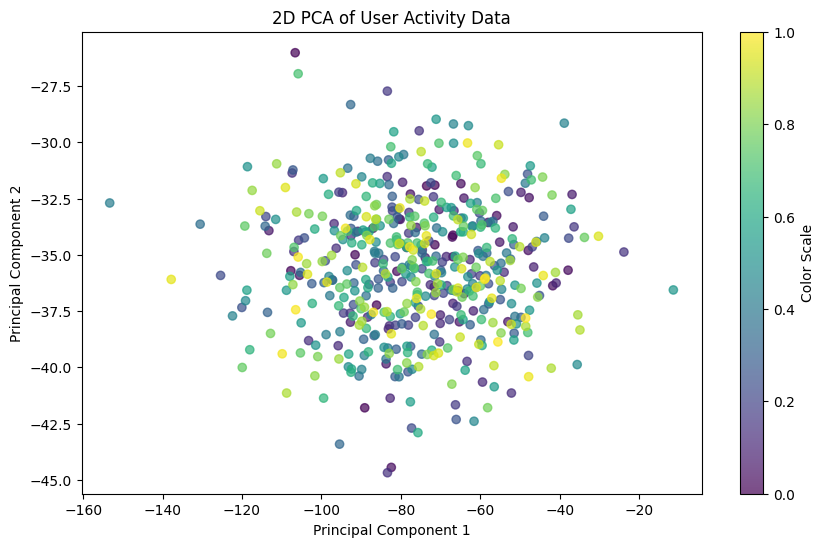

In [29]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(projected_data_2d[:, 0], projected_data_2d[:, 1], c=colors, cmap='viridis', alpha=0.7)

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of User Activity Data')

# Add a color bar
plt.colorbar(label='Color Scale')

# Show the plot
plt.show()

a) The data points overlap significantly, it suggests that the principal components do not provide a clear separation, and the underlying structure of the data might not be well captured by the first two principal components.


### 2D Representation of the Data

The 2D representation captures the original structure of the data by projecting it onto the first two principal components. These principal components are the directions in which the data varies the most. By reducing the dimensionality from four to two, we can visualize the data in a 2D space while retaining as much of the original variance as possible.

However, it's important to note that while the first two principal components capture the majority of the variance, they may not capture all the underlying structure of the data. This is evident from the significant overlap of data points in the scatter plot, suggesting that the first two principal components do not provide a clear separation of the data. Therefore, while the 2D representation provides a useful visualization, it may not fully represent the complexity of the original dataset.
